In [2]:
#pip install mysql-connector-python
#pip install --upgrade sqlalchemy

In [3]:
import mysql.connector
import pandas as pd
#from mysql.connector import connect, errorcode
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import plotly.express as px

In [4]:
#plt.style.available

In [5]:
from sqlalchemy import create_engine, text
user = 'root'
password = '20mnUXN5N5'
host = 'localhost'
database = 'Data'

# Create an SQLAlchemy engine
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database}')


In [6]:
sql_query = "SELECT * FROM shootingsottawa order by ID"

with engine.connect() as conn:
    df = pd.read_sql(text(sql_query), con=conn)

In [7]:
df.head(10)

,ID,Reported_Date,Reported_Hour,Reported_Year,Occurred_Date,Occurred_Hour,Occurred_Year,Time_of_Day,Weekday,Day_of_Week,Neighbourhood,Sector,Division,Ward,Councillor,Census_Tract,Level_of_Injury,x,y,Occurred_Month
0,1,2018-01-03 05:00:00,200,2018,2018-01-03 05:00:00,2200,2018,Evening,Wednesday,3,Elmvale - Eastway - Riverview - Riverview Park...,33,East,Ward 18 - Alta Vista,Marty Carr,5050008.00,UNKNOWN,-75.621874,45.388197,January
1,2,2018-01-05 05:00:00,1900,2018,2018-01-05 05:00:00,1900,2018,Evening,Friday,5,Overbrook - McArthur,25,Central,Ward 13 - Rideau-Rockcliffe,Rawlson King,5050012.00,UNKNOWN,-75.647223,45.426179,January
2,3,2018-01-05 05:00:00,100,2018,2018-01-04 05:00:00,2300,2018,Evening,Thursday,4,West Centertown,22,Central,Ward 14 - Somerset,Ariel Troster,5050042.00,MAJOR,-75.710548,45.406629,January
3,4,2018-01-09 05:00:00,200,2018,2018-01-09 05:00:00,2000,2018,Evening,Tuesday,2,Hunt Club East - Western Community,35,East,Ward 16 - River,Riley Brockington,5050002.05,FATAL,-75.674849,45.349145,January
4,5,2018-01-10 05:00:00,1900,2018,2018-01-10 05:00:00,1900,2018,Evening,Wednesday,3,Rockcliffe - Manor Park,25,Central,Ward 13 - Rideau-Rockcliffe,Rawlson King,5050059.00,UNKNOWN,-75.652362,45.450809,January
5,6,2018-01-13 05:00:00,200,2018,2018-01-13 05:00:00,2100,2018,Evening,Saturday,6,Bells Corners West,15,West,Ward 8 - College,Laine Johnson,5050136.02,NONE,-75.840502,45.316065,January
6,7,2018-01-16 05:00:00,1600,2018,2018-01-16 05:00:00,1600,2018,Afternoon,Tuesday,2,Ledbury - Heron Gate - Ridgemont - Elmwood,34,East,Ward 16 - River,Riley Brockington,5050001.10,MAJOR,-75.654366,45.374002,January
7,8,2018-01-18 05:00:00,600,2018,2018-01-18 05:00:00,500,2018,Night,Thursday,4,Centretown,23,Central,Ward 14 - Somerset,Ariel Troster,5050037.02,FATAL,-75.685400,45.415181,January
8,9,2018-01-18 05:00:00,200,2018,2018-01-18 05:00:00,2300,2018,Evening,Thursday,4,Hintonburg - Mechanicsville,21,Central,Ward 15 - Kitchissippi,Jeff Leiper,5050046.00,UNKNOWN,-75.730763,45.409080,January
9,10,2018-01-19 05:00:00,200,2018,2018-01-19 05:00:00,2000,2018,Evening,Friday,5,Riverside South - Leitrim,35,East,Ward 22 - Riverside South-Findlay Creek,Steve Desroches,5050126.07,NONE,-75.612373,45.311365,January


In [8]:
print(df.shape)
df.columns

(456, 20)


Index(['ID', 'Reported_Date', 'Reported_Hour', 'Reported_Year',
       'Occurred_Date', 'Occurred_Hour', 'Occurred_Year', 'Time_of_Day',
       'Weekday', 'Day_of_Week', 'Neighbourhood', 'Sector', 'Division', 'Ward',
       'Councillor', 'Census_Tract', 'Level_of_Injury', 'x', 'y',
       'Occurred_Month'],
      dtype='object')

In [9]:
df.iloc[[2]]

,ID,Reported_Date,Reported_Hour,Reported_Year,Occurred_Date,Occurred_Hour,Occurred_Year,Time_of_Day,Weekday,Day_of_Week,Neighbourhood,Sector,Division,Ward,Councillor,Census_Tract,Level_of_Injury,x,y,Occurred_Month
2,3,2018-01-05 05:00:00,100,2018,2018-01-04 05:00:00,2300,2018,Evening,Thursday,4,West Centertown,22,Central,Ward 14 - Somerset,Ariel Troster,5050042.0,MAJOR,-75.710548,45.406629,January


In [10]:
df1 = df.isnull()
df1.head()

,ID,Reported_Date,Reported_Hour,Reported_Year,Occurred_Date,Occurred_Hour,Occurred_Year,Time_of_Day,Weekday,Day_of_Week,Neighbourhood,Sector,Division,Ward,Councillor,Census_Tract,Level_of_Injury,x,y,Occurred_Month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
#df1.columns.values.tolist()

In [12]:
for column in df1.columns.values.tolist():    # Checking to see if there are any missing fields in the dataset. 
    print(column)
    print (df1[column].value_counts())
    print("")  

ID
False    456
Name: ID, dtype: int64

Reported_Date
False    456
Name: Reported_Date, dtype: int64

Reported_Hour
False    456
Name: Reported_Hour, dtype: int64

Reported_Year
False    456
Name: Reported_Year, dtype: int64

Occurred_Date
False    456
Name: Occurred_Date, dtype: int64

Occurred_Hour
False    456
Name: Occurred_Hour, dtype: int64

Occurred_Year
False    456
Name: Occurred_Year, dtype: int64

Time_of_Day
False    456
Name: Time_of_Day, dtype: int64

Weekday
False    456
Name: Weekday, dtype: int64

Day_of_Week
False    456
Name: Day_of_Week, dtype: int64

Neighbourhood
False    456
Name: Neighbourhood, dtype: int64

Sector
False    456
Name: Sector, dtype: int64

Division
False    456
Name: Division, dtype: int64

Ward
False    456
Name: Ward, dtype: int64

Councillor
False    456
Name: Councillor, dtype: int64

Census_Tract
False    456
Name: Census_Tract, dtype: int64

Level_of_Injury
False    456
Name: Level_of_Injury, dtype: int64

x
False    456
Name: x, dtype: int

In [13]:
len(df['Neighbourhood'].unique())

91

In [14]:
df['Neighbourhood'].value_counts().head(12)

Overbrook - McArthur                          25
Ledbury - Heron Gate - Ridgemont - Elmwood    25
Byward Market                                 24
Centretown                                    20
Lowertown                                     18
Vanier North                                  17
Whitehaven - Queensway Terrace North          15
Hunt Club Park                                15
Britannia Village                             13
Greenboro East                                11
Cummings                                      11
Emerald Woods - Sawmill Creek                 11
Name: Neighbourhood, dtype: int64

In [15]:
df[['Level_of_Injury']].value_counts()

Level_of_Injury
UNKNOWN            176
MAJOR              100
NONE                91
MINOR               61
FATAL               27
NOT APPLICABLE       1
dtype: int64

In [16]:
sql_query1= "SELECT Level_of_Injury, COUNT(*) as Total FROM shootingsottawa GROUP BY Level_of_Injury ORDER BY Total Desc"

with engine.connect() as conn:
    series = pd.read_sql(text(sql_query1), con=conn)

series = series.set_index('Level_of_Injury')   # We have excluded rows without an entry
series = series['Total']                       # in the Level of Injury column

series #pandas series 

Level_of_Injury
UNKNOWN           176
MAJOR             100
NONE               91
MINOR              61
FATAL              27
NOT APPLICABLE      1
Name: Total, dtype: int64

In [17]:
# for index, value in enumerate(series):
#     print(index,value)

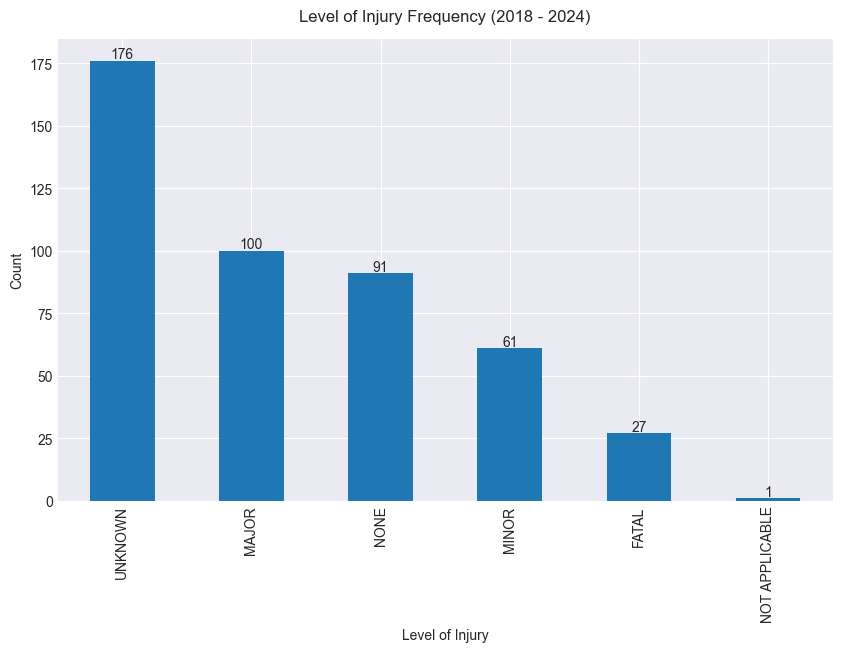

In [18]:
series.plot(kind ='bar', figsize=(10, 6), legend = False)
#plt.bar(series.index, series.values)

plt.xlabel('Level of Injury')
plt.ylabel('Count')
plt.title('Level of Injury Frequency (2018 - 2024)', y= 1.02)
plt.grid(True)

for index, value in enumerate(series):
    #label = format(int(value), ',')
    #below commented string useful for bar graphs and not column graphs
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(value, xy=( index, value+1 ), ha='center')


plt.show()

In [19]:
#df['Level_of_Injury'].isnull() #.value_counts()

In [20]:
LoI = df['Level_of_Injury'].value_counts()
LoI

UNKNOWN           176
MAJOR             100
NONE               91
MINOR              61
FATAL              27
NOT APPLICABLE      1
Name: Level_of_Injury, dtype: int64

In [21]:
fig = px.bar(LoI, x = LoI.index, y = LoI.values, text = LoI.values, width=800, height=600,
        labels={"index": "Level of Injury", "y" : "Shooting Events"}
)

fig.update_traces(textposition='outside')
fig.update_layout(title={
                         'text': 'Level of Injury Frequency (2018 - 2024)',
                         'x': 0.5,  # Center the title horizontally
                         'xanchor': 'center'  # Anchor the title to the center
})


fig.show()

In [22]:
df_ToD = df['Time_of_Day'].value_counts()
df_ToD

Evening      193
Night        135
Afternoon     91
Morning       37
Name: Time_of_Day, dtype: int64

In [23]:
df_ToD = df_ToD.to_frame('Number of Incidents')    #.reset_index().rename(columns={'index': 'Time of Day', 'Time of Day': 'Number of incidents'})
df_ToD

,Number of Incidents
Evening,193
Night,135
Afternoon,91
Morning,37


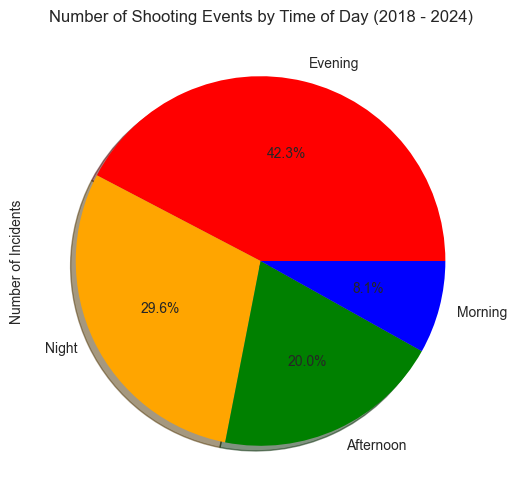

<function matplotlib.pyplot.show(close=None, block=None)>

In [24]:
colors = ['red', 'orange', 'green', 'blue']

df_ToD.plot(kind ='pie', y = 'Number of Incidents',figsize=(10, 6), colors= colors, autopct='%1.1f%%', shadow = True,legend = False)
plt.title('Number of Shooting Events by Time of Day (2018 - 2024)')
plt.show

In [25]:
df_ToD

,Number of Incidents
Evening,193
Night,135
Afternoon,91
Morning,37


In [26]:
df_ToD.index[0]

'Evening'

In [27]:
dfcheck = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C', 'B', 'C'],
    'X': [1, 2, 3, 4, 5, 6],
    'Y': [10, 15, 13, 17, 14, 19]
})
dfcheck

,Category,X,Y
0,A,1,10
1,B,2,15
2,A,3,13
3,C,4,17
4,B,5,14
5,C,6,19


In [28]:
figure = px.pie(df_ToD, values ='Number of Incidents', names =df_ToD.index, hole=.25, width=800, height=600,
                             #text = df_ToD.values
                             labels={"index" : 'Time of Day'},
                             color = df_ToD.index,
                             color_discrete_map = {df_ToD.index[0]: 'red', df_ToD.index[1]:'orange', df_ToD.index[2]:'green', df_ToD.index[3]: 'blue'}
                             #title= 'Number of Shooting Events by Time of Day (2018 - 2024)'
)

figure.update_layout(title={
                         'text': 'Number of Shooting Events by Time of Day (2018 - 2024)',
                         'x': 0.5,  # Center the title horizontally
                         'xanchor': 'center'  # Anchor the title to the center
})

figure

In [29]:
df_division = df[['Division', 'Level_of_Injury']].groupby('Division').count()
df_division = df_division['Level_of_Injury'].sort_values(ascending =False) # to series
df_division

Division
East       185
Central    154
West       117
Name: Level_of_Injury, dtype: int64

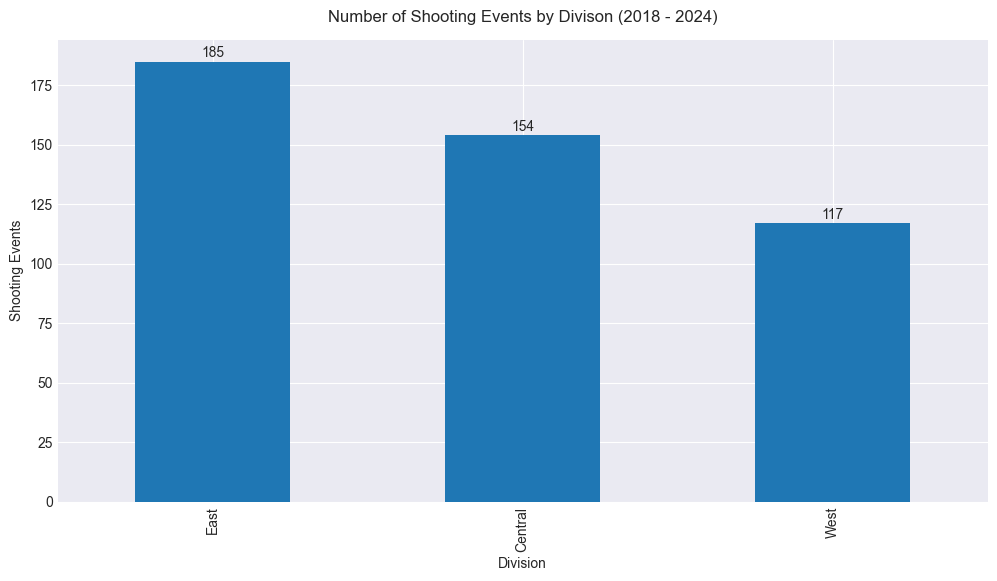

In [30]:
df_division.plot(kind ='bar', figsize=(12, 6), legend = False)

plt.xlabel('Division')
plt.ylabel('Shooting Events')
plt.title('Number of Shooting Events by Divison (2018 - 2024)', y= 1.02)
plt.grid(True)

for index, value in enumerate(df_division):
    #label = format(int(value), ',')
    #below commented string useful for bar graphs and not column graphs
    #place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(value, xy=( index, value+2 ), ha='center')


plt.show()

In [31]:
figure = px.bar(df_division, x =df_division.index, y = df_division.values,width=800, height=600,
                             text = df_division.values,
                             labels={"y" : 'Shooting Events'},
                             #title= 'Number of Shooting Events by Divison (2018 - 2024)'
)

figure.update_layout(title={
                         'text': 'Number of Shooting Events by Divison (2018 - 2024)',
                         'x': 0.5,  # Center the title horizontally
                         'xanchor': 'center'  # Anchor the title to the center
})

figure

In [32]:
df[['Occurred_Year', 'Level_of_Injury']].groupby('Occurred_Year').count()

,Level_of_Injury
Occurred_Year,
2018,78
2019,73
2020,46
2021,82
2022,60
2023,74
2024,43


In [33]:
df_years = df[['Occurred_Year', 'Level_of_Injury', 'ID']].groupby(['Occurred_Year','Level_of_Injury']).count()
df_years

ID
Occurred_Year Level_of_Injury    
2018          FATAL             5
              MAJOR            15
              MINOR            11
              NONE             17
              UNKNOWN          30
2019          FATAL             4
              MAJOR            14
              MINOR            11
              NONE             16
              UNKNOWN          28
2020          FATAL             3
              MAJOR             7
              MINOR             4
              NONE             16
              NOT APPLICABLE    1
              UNKNOWN          15
2021          FATAL             5
              MAJOR            22
              MINOR             8
              NONE             16
              UNKNOWN          31
2022          FATAL             3
              MAJOR            17
              MINOR            11
              NONE              5
              UNKNOWN          24
2023          FATAL             6
              MAJOR            14
              MINOR            13
              NONE             12
              UNKNOWN          29
2024          FATAL             1
              MAJOR            11
              MINOR             3
              NONE              9
              UNKNOWN          19

In [34]:
df_years= df_years.reset_index()
df_years.head()

,Occurred_Year,Level_of_Injury,ID
0,2018,FATAL,5
1,2018,MAJOR,15
2,2018,MINOR,11
3,2018,NONE,17
4,2018,UNKNOWN,30


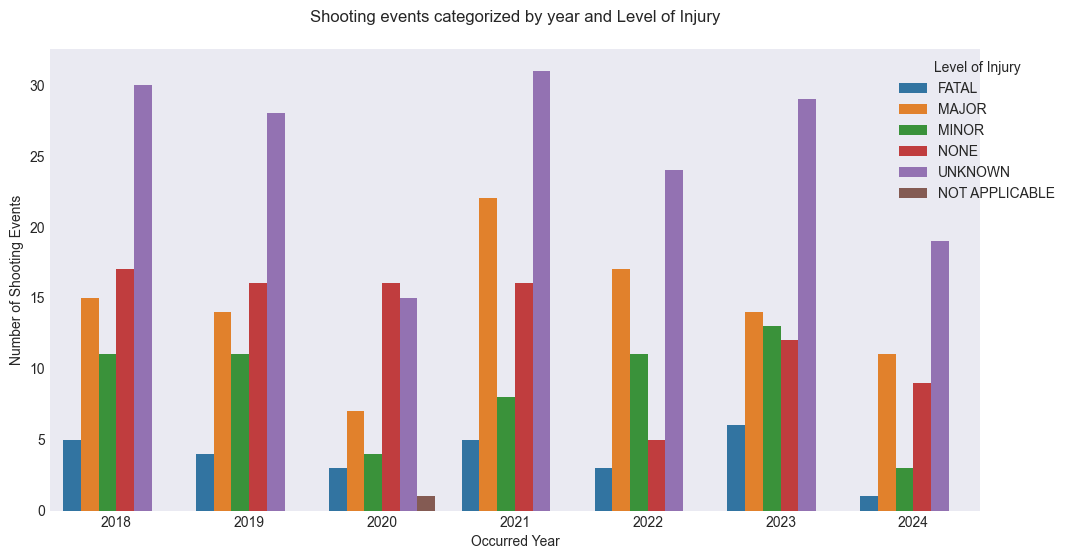

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(df_years, x = 'Occurred_Year', y = 'ID', hue= 'Level_of_Injury')
plt.ylabel('Number of Shooting Events')
plt.xlabel('Occurred Year')
plt.title('Shooting events categorized by year and Level of Injury', y= 1.04)
plt.legend(title='Level of Injury', bbox_to_anchor=(0.9, 1), loc='upper left') 
plt.grid(False)
plt.show()
#Shooting events categorized by year - rows without an entry in the Level of Injury column
#have been omitted. 

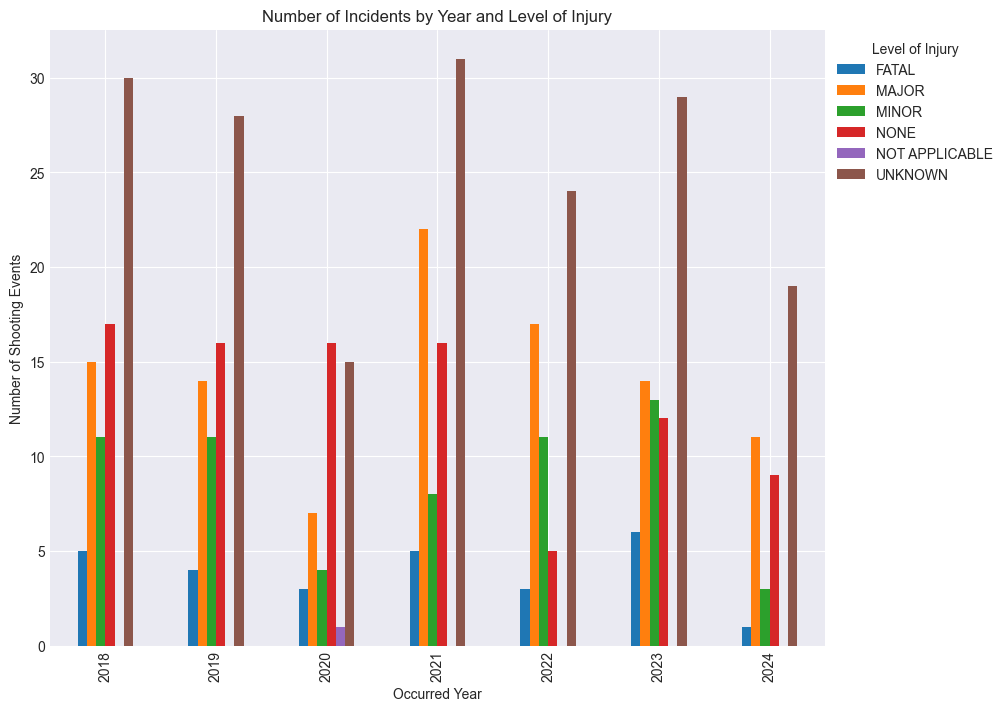

In [36]:
pivot_df = df_years.pivot(index='Occurred_Year', columns='Level_of_Injury', values='ID')

# Plotting
#plt.figure(figsize=(20,10))
pivot_df.plot(kind='bar',stacked=False, figsize=(10,8))
plt.title('Number of Incidents by Year and Level of Injury')
plt.xlabel('Occurred Year')
plt.ylabel('Number of Shooting Events')
plt.legend(title='Level of Injury', bbox_to_anchor=(1., 1), loc='upper left') 
plt.show()
#Shooting events categorized by year - rows without an entry in the Level of Injury column
#have been omitted. 

In [37]:
# !pip install sorted-months-weekdays
# !pip install sort-dataframeby-monthorweek

In [38]:

df_month = df[['Occurred_Month', 'Level_of_Injury', 'ID']].groupby(['Occurred_Month','Level_of_Injury']).count() 
df_month = df_month.reset_index()
df_month

,Occurred_Month,Level_of_Injury,ID
0,April,FATAL,1
1,April,MAJOR,4
2,April,MINOR,5
3,April,NONE,8
4,April,UNKNOWN,10
5,August,FATAL,2
6,August,MAJOR,8
7,August,MINOR,5
8,August,NONE,8
9,August,UNKNOWN,19


In [39]:
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

df_month_sorted = Sort_Dataframeby_Month(df=df_month,monthcolumnname='Occurred_Month')
df_month_sorted

,Occurred_Month,Level_of_Injury,ID
0,January,FATAL,5
1,January,MAJOR,11
2,January,MINOR,9
3,January,NONE,6
4,January,UNKNOWN,14
5,February,FATAL,5
6,February,MAJOR,8
7,February,MINOR,4
8,February,NONE,8
9,February,UNKNOWN,9


In [40]:
pivot_month_df = df_month_sorted.pivot(index='Occurred_Month', columns='Level_of_Injury', values='ID')
pivot_month_df = pivot_month_df.reset_index()
pivot_month_df = Sort_Dataframeby_Month(df=pivot_month_df,monthcolumnname='Occurred_Month')
pivot_month_df = pivot_month_df.set_index('Occurred_Month')
pivot_month_df

,FATAL,MAJOR,MINOR,NONE,NOT APPLICABLE,UNKNOWN
Occurred_Month,,,,,,
January,5.0,11.0,9.0,6.0,NaN,14.0
February,5.0,8.0,4.0,8.0,NaN,9.0
March,1.0,6.0,3.0,6.0,NaN,18.0
April,1.0,4.0,5.0,8.0,NaN,10.0
May,3.0,11.0,6.0,7.0,NaN,19.0
June,3.0,14.0,4.0,5.0,NaN,23.0
July,3.0,11.0,4.0,18.0,NaN,14.0
August,2.0,8.0,5.0,8.0,NaN,19.0
September,NaN,8.0,9.0,11.0,1.0,14.0


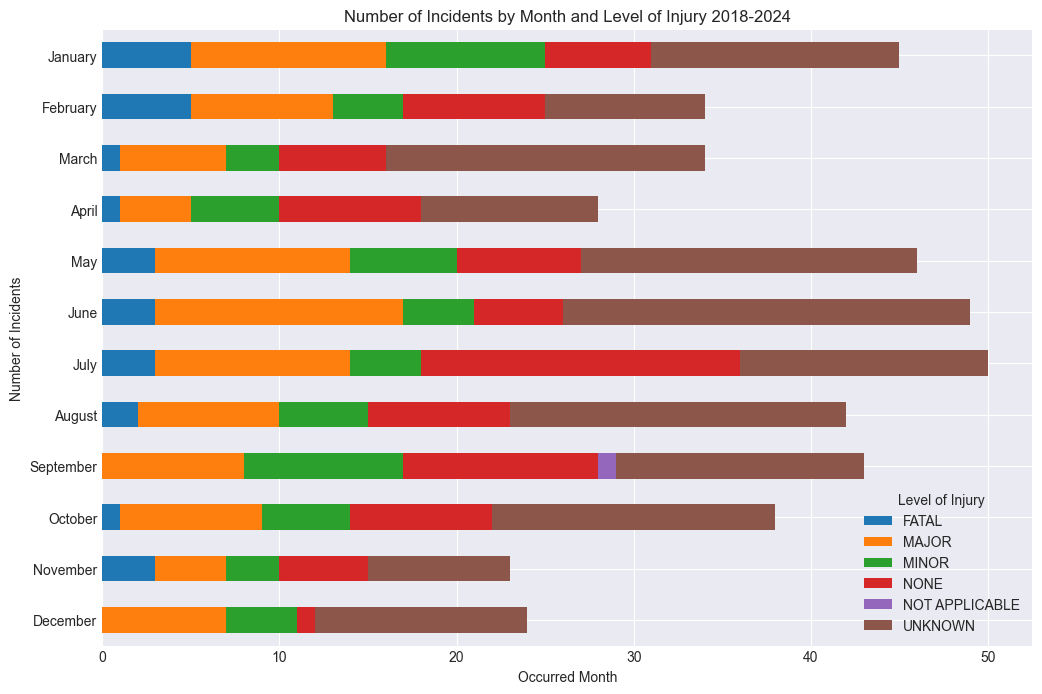

In [41]:
# Plotting
pivot_month_df.plot(kind='barh', stacked=True, figsize = (12,8))
plt.title('Number of Incidents by Month and Level of Injury 2018-2024')
plt.xlabel('Occurred Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Level of Injury')
plt.gca().invert_yaxis()
#plt.xticks(list(pivot_month_df['Occurred_Month']))
plt.show()

In [42]:
#Top  Neighbourhoods that have shooting events in double digits 
#(Including recorded shootings with no input in column Level of Injury)
df['Neighbourhood'].value_counts().head(12)

Overbrook - McArthur                          25
Ledbury - Heron Gate - Ridgemont - Elmwood    25
Byward Market                                 24
Centretown                                    20
Lowertown                                     18
Vanier North                                  17
Whitehaven - Queensway Terrace North          15
Hunt Club Park                                15
Britannia Village                             13
Greenboro East                                11
Cummings                                      11
Emerald Woods - Sawmill Creek                 11
Name: Neighbourhood, dtype: int64

In [43]:
year_input = int(input('Enter a year from 2018 - 2024: '))
df_peryear = df[df['Occurred_Year'] == year_input]
top_10_neighborhoods = df_peryear['Neighbourhood'].value_counts().head(10)#.index
top_10_neighborhoods

Cummings                                4
Whitehaven - Queensway Terrace North    4
Riverside Park                          3
Centretown                              3
Bells Corners West                      3
Bayshore                                3
Britannia Village                       2
Munster                                 2
Iris                                    2
Overbrook - McArthur                    2
Name: Neighbourhood, dtype: int64

In [44]:
df_peryear

,ID,Reported_Date,Reported_Hour,Reported_Year,Occurred_Date,Occurred_Hour,Occurred_Year,Time_of_Day,Weekday,Day_of_Week,Neighbourhood,Sector,Division,Ward,Councillor,Census_Tract,Level_of_Injury,x,y,Occurred_Month
151,152,2020-01-01 05:00:00,800,2020,2020-01-01 05:00:00,400,2020,Night,Wednesday,3,Chapman Mills - Rideau Crest - Davidson Heights,16,West,Ward 24 - Barrhaven East,Wilson Lo,5050141.13,UNKNOWN,-75.711356,45.264826,January
152,153,2020-01-02 05:00:00,0,2020,2020-01-01 05:00:00,2200,2020,Evening,Wednesday,3,West Centertown,22,Central,Ward 14 - Somerset,Ariel Troster,5050041.00,MAJOR,-75.705748,45.411451,January
153,154,2020-01-08 05:00:00,700,2020,2020-01-08 05:00:00,700,2020,Morning,Wednesday,3,Centretown,23,Central,Ward 14 - Somerset,Ariel Troster,5050040.00,FATAL,-75.697431,45.413172,January
154,155,2020-02-08 05:00:00,200,2020,2020-02-08 05:00:00,2100,2020,Evening,Saturday,6,Bells Corners West,15,West,Ward 8 - College,Laine Johnson,5050136.02,MAJOR,-75.831284,45.313399,February
155,156,2020-03-15 05:00:00,1300,2020,2020-03-15 05:00:00,1300,2020,Afternoon,Sunday,7,Bells Corners West,15,West,Ward 8 - College,Laine Johnson,5050136.02,MINOR,-75.841900,45.318536,March
156,157,2020-03-25 05:00:00,1500,2020,2020-03-25 05:00:00,1100,2020,Morning,Wednesday,3,Carleton Heights - Rideauview,17,West,Ward 16 - River,Riley Brockington,5050020.01,UNKNOWN,-75.707868,45.367941,March
157,158,2020-03-26 05:00:00,200,2020,2020-03-26 05:00:00,2100,2020,Evening,Thursday,4,Centretown,23,Central,Ward 14 - Somerset,Ariel Troster,5050039.00,UNKNOWN,-75.702199,45.405320,March
158,159,2020-04-01 05:00:00,1400,2020,2020-04-01 05:00:00,1400,2020,Afternoon,Wednesday,3,Ottawa South,22,Central,Ward 17 - Capital,Shawn Menard,5050020.01,NONE,-75.695825,45.388892,April
159,160,2020-04-15 05:00:00,200,2020,2020-04-15 05:00:00,2300,2020,Evening,Wednesday,3,Bayshore,14,West,Ward 7 - Bay,Theresa Kavanagh,5050138.00,UNKNOWN,-75.806463,45.351491,April
160,161,2020-05-01 05:00:00,200,2020,2020-05-01 05:00:00,2200,2020,Evening,Friday,5,Cummings,32,East,Ward 11 - Beacon Hill-Cyrville,Tim Tierney,5050122.01,MAJOR,-75.634012,45.426825,May


In [45]:
top_10_neighborhoods.index

Index(['Cummings', 'Whitehaven - Queensway Terrace North', 'Riverside Park',
       'Centretown', 'Bells Corners West', 'Bayshore', 'Britannia Village',
       'Munster', 'Iris', 'Overbrook - McArthur'],
      dtype='object')

In [46]:
df_Neighbourhood = df_peryear[['Neighbourhood', 'Level_of_Injury','ID']]\
                   .groupby(['Neighbourhood','Level_of_Injury']).count()    #.nlargest(:,'ID')#.sort_values('Level of Injury')
#df_Neighbourhood =df_Neighbourhood.reset_index()
df_Neighbourhood.head(10)

ID
Neighbourhood                Level_of_Injury    
Bayshore                     MINOR             1
                             NONE              1
                             UNKNOWN           1
Bells Corners East           NONE              1
Bells Corners West           MAJOR             1
                             MINOR             1
                             UNKNOWN           1
Billings Bridge - Alta Vista UNKNOWN           1
Bridlewood - Emerald Meadows NONE              1
Britannia Village            NONE              1

In [47]:
df_Top10Neighbourhoods = df_Neighbourhood.reset_index()
df_Top10Neighbourhoods = df_Top10Neighbourhoods.set_index('Neighbourhood').loc[top_10_neighborhoods.index]
df_Top10Neighbourhoods = df_Top10Neighbourhoods.reset_index()
df_Top10Neighbourhoods.rename(columns = {'index':'Neighbourhood'}, inplace=True)
df_Top10Neighbourhoods


,Neighbourhood,Level_of_Injury,ID
0,Cummings,MAJOR,1
1,Cummings,UNKNOWN,3
2,Whitehaven - Queensway Terrace North,FATAL,1
3,Whitehaven - Queensway Terrace North,NONE,3
4,Riverside Park,MAJOR,1
5,Riverside Park,MINOR,1
6,Riverside Park,NONE,1
7,Centretown,FATAL,1
8,Centretown,MAJOR,1
9,Centretown,UNKNOWN,1


In [48]:
top_10_neighborhoods.index

Index(['Cummings', 'Whitehaven - Queensway Terrace North', 'Riverside Park',
       'Centretown', 'Bells Corners West', 'Bayshore', 'Britannia Village',
       'Munster', 'Iris', 'Overbrook - McArthur'],
      dtype='object')

In [49]:
#df_Neighbourhood.index.get_level_values('Neighbourhood')  # getting the index level of a multi index dataframe


In [50]:
pivot_Top10N_df = df_Top10Neighbourhoods.pivot(index='Neighbourhood', columns='Level_of_Injury', values='ID')
pivot_Top10N_df
pivot_Top10N_df = pivot_Top10N_df.reindex(index = top_10_neighborhoods.index, columns = pivot_Top10N_df.columns)
pivot_Top10N_df

Level_of_Injury,FATAL,MAJOR,MINOR,NONE,UNKNOWN
Cummings,NaN,1.0,NaN,NaN,3.0
Whitehaven - Queensway Terrace North,1.0,NaN,NaN,3.0,NaN
Riverside Park,NaN,1.0,1.0,1.0,NaN
Centretown,1.0,1.0,NaN,NaN,1.0
Bells Corners West,NaN,1.0,1.0,NaN,1.0
Bayshore,NaN,NaN,1.0,1.0,1.0
Britannia Village,NaN,NaN,NaN,1.0,1.0
Munster,NaN,NaN,NaN,1.0,1.0
Iris,NaN,NaN,NaN,2.0,NaN
Overbrook - McArthur,NaN,NaN,1.0,1.0,NaN


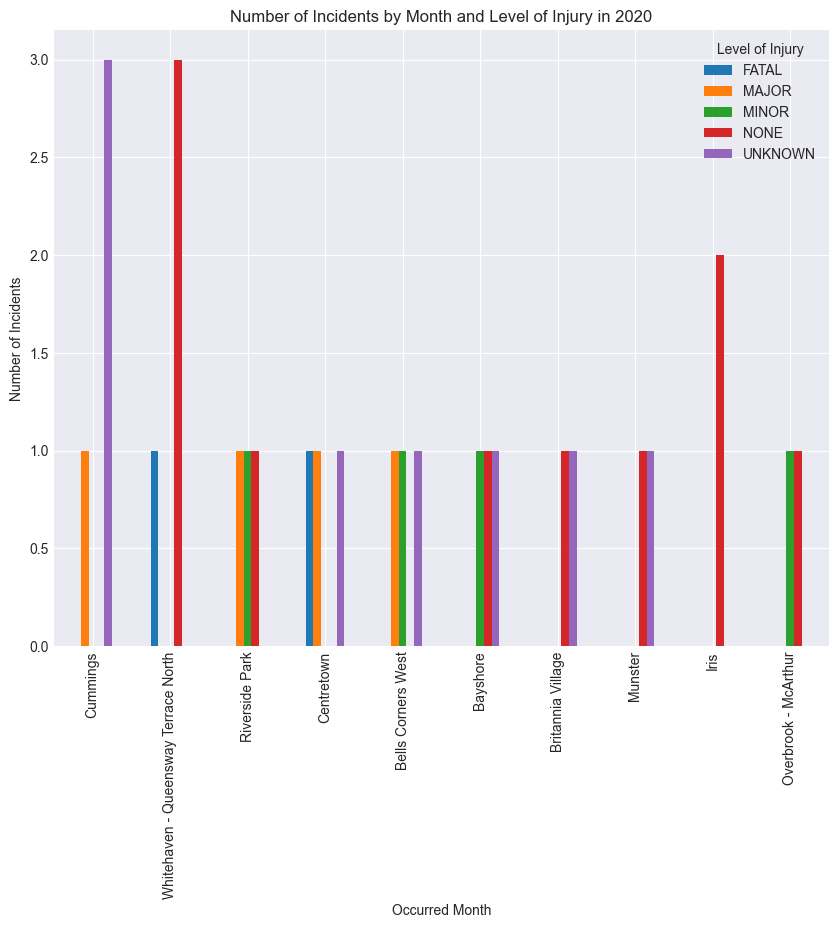

In [51]:
# Plotting
pivot_Top10N_df.plot(kind='bar', stacked=False, figsize = (10,8))
plt.title(f'Number of Incidents by Month and Level of Injury in {year_input}')
plt.xlabel('Occurred Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Level of Injury')
#plt.xticks(list(pivot_month_df['Occurred_Month']))
plt.show()

In [52]:
fig = px.bar(pivot_Top10N_df, x =pivot_Top10N_df.index, y =pivot_Top10N_df.columns, width=800, height=600, barmode='group',
        labels={"value" : 'Shooting Events', 'index':'Neighbourhood'},
        #title= f'Number of Shooting Events by Neighbourhood in {year_input}')
)
fig.update_layout(title={
                         'text': f'Number of Shooting Events by Neighbourhood in {year_input}',
                         'x': 0.5,  # Center the title horizontally
                         'xanchor': 'center'  # Anchor the title to the center
})

fig

In [53]:
df[['Ward', 'Councillor']].value_counts().sort_values(ascending= False)

Ward                                     Councillor       
Ward 10 - Gloucester-Southgate           Jessica Bradley      67
Ward 12 - Rideau-Vanier                  StZphanie Plante     66
Ward 7 - Bay                             Theresa Kavanagh     39
Ward 16 - River                          Riley Brockington    38
Ward 13 - Rideau-Rockcliffe              Rawlson King         32
Ward 8 - College                         Laine Johnson        32
Ward 18 - Alta Vista                     Marty Carr           32
Ward 14 - Somerset                       Ariel Troster        31
Ward 11 - Beacon Hill-Cyrville           Tim Tierney          21
Ward 9 - Knoxdale-Merivale               Sean Devine          15
Ward 15 - Kitchissippi                   Jeff Leiper          14
Ward 2 - OrlZans West-Innes              Laura Dudas          12
Ward 20 - Osgoode                        George Darouze        9
Ward 17 - Capital                        Shawn Menard          8
Ward 22 - Riverside South-Findl

In [54]:
top_10_Councillors = df_peryear['Councillor'].value_counts().head(10)#.index  BY YEAR
top_10_Councillors

Theresa Kavanagh     9
Laine Johnson        8
Riley Brockington    5
Ariel Troster        4
Rawlson King         4
Tim Tierney          3
Shawn Menard         2
David Brown          2
Sean Devine          2
Allan Hubley         2
Name: Councillor, dtype: int64

In [55]:
df_councillor = df_peryear[['Councillor','Level_of_Injury','ID']]\
                   .groupby(['Councillor','Level_of_Injury']).count()    
#df_Neighbourhood =df_Neighbourhood.reset_index()
df_councillor.head(10)

ID
Councillor    Level_of_Injury    
Allan Hubley  NONE              2
Ariel Troster FATAL             1
              MAJOR             2
              UNKNOWN           1
Clarke Kelly  UNKNOWN           1
David Brown   NONE              1
              UNKNOWN           1
Laine Johnson MAJOR             1
              MINOR             1
              NONE              4

In [56]:
top_10_Councillors.index

Index(['Theresa Kavanagh', 'Laine Johnson', 'Riley Brockington',
       'Ariel Troster', 'Rawlson King', 'Tim Tierney', 'Shawn Menard',
       'David Brown', 'Sean Devine', 'Allan Hubley'],
      dtype='object')

In [57]:
df_Top10Councillor = df_councillor.reset_index()
# df_Top10Wards
df_Top10Councillor = df_Top10Councillor.set_index('Councillor')#.loc[top_10_wards.index]

df_Top10Councillor = df_Top10Councillor.loc[top_10_Councillors.index]  #.get_level_values('Councillor')
df_Top10Councillor
# df_Top10Wards = df_Top10Wards.reset_index()
# df_Top10Wards.rename(columns = {'index':'Neighbourhood'}, inplace=True)
# df_Top10Wards

,Level_of_Injury,ID
Theresa Kavanagh,FATAL,1
Theresa Kavanagh,MINOR,1
Theresa Kavanagh,NONE,5
Theresa Kavanagh,UNKNOWN,2
Laine Johnson,MAJOR,1
Laine Johnson,MINOR,1
Laine Johnson,NONE,4
Laine Johnson,UNKNOWN,2
Riley Brockington,MAJOR,1
Riley Brockington,MINOR,1


In [58]:
top_10_wards = df[['Ward','Councillor']].value_counts().head(10)#.index
top_10_wards

Ward                            Councillor       
Ward 10 - Gloucester-Southgate  Jessica Bradley      67
Ward 12 - Rideau-Vanier         StZphanie Plante     66
Ward 7 - Bay                    Theresa Kavanagh     39
Ward 16 - River                 Riley Brockington    38
Ward 13 - Rideau-Rockcliffe     Rawlson King         32
Ward 8 - College                Laine Johnson        32
Ward 18 - Alta Vista            Marty Carr           32
Ward 14 - Somerset              Ariel Troster        31
Ward 11 - Beacon Hill-Cyrville  Tim Tierney          21
Ward 9 - Knoxdale-Merivale      Sean Devine          15
dtype: int64

In [59]:
df_ward = df[['Ward','Councillor','Level_of_Injury','ID']]\
                   .groupby(['Ward','Councillor','Level_of_Injury']).count()    
df_ward =df_ward.reset_index()
df_ward.head(10)
#df_ward[['ID']].groupby(level = 0).sum().sort_values('ID',  ascending = False)

,Ward,Councillor,Level_of_Injury,ID
0,Ward 1 - OrlZans East-Cumberland,Matthew Luloff,FATAL,1
1,Ward 1 - OrlZans East-Cumberland,Matthew Luloff,MINOR,2
2,Ward 1 - OrlZans East-Cumberland,Matthew Luloff,UNKNOWN,3
3,Ward 10 - Gloucester-Southgate,Jessica Bradley,FATAL,5
4,Ward 10 - Gloucester-Southgate,Jessica Bradley,MAJOR,15
5,Ward 10 - Gloucester-Southgate,Jessica Bradley,MINOR,13
6,Ward 10 - Gloucester-Southgate,Jessica Bradley,NONE,11
7,Ward 10 - Gloucester-Southgate,Jessica Bradley,UNKNOWN,23
8,Ward 11 - Beacon Hill-Cyrville,Tim Tierney,FATAL,2
9,Ward 11 - Beacon Hill-Cyrville,Tim Tierney,MAJOR,7


In [60]:
top_10_wards.index.get_level_values('Ward')

Index(['Ward 10 - Gloucester-Southgate', 'Ward 12 - Rideau-Vanier',
       'Ward 7 - Bay', 'Ward 16 - River', 'Ward 13 - Rideau-Rockcliffe',
       'Ward 8 - College', 'Ward 18 - Alta Vista', 'Ward 14 - Somerset',
       'Ward 11 - Beacon Hill-Cyrville', 'Ward 9 - Knoxdale-Merivale'],
      dtype='object', name='Ward')

In [61]:
df_Top10Wards = df_ward.set_index('Ward').loc[top_10_wards.index.get_level_values('Ward')]
df_Top10Wards

,Councillor,Level_of_Injury,ID
Ward,,,
Ward 10 - Gloucester-Southgate,Jessica Bradley,FATAL,5
Ward 10 - Gloucester-Southgate,Jessica Bradley,MAJOR,15
Ward 10 - Gloucester-Southgate,Jessica Bradley,MINOR,13
Ward 10 - Gloucester-Southgate,Jessica Bradley,NONE,11
Ward 10 - Gloucester-Southgate,Jessica Bradley,UNKNOWN,23
Ward 12 - Rideau-Vanier,StZphanie Plante,FATAL,5
Ward 12 - Rideau-Vanier,StZphanie Plante,MAJOR,22
Ward 12 - Rideau-Vanier,StZphanie Plante,MINOR,7
Ward 12 - Rideau-Vanier,StZphanie Plante,NONE,12


In [62]:
#df_Top10Wards.loc['Ward 1 - Orleans East-Cumberland']

In [63]:
top_10_wards.index.get_level_values('Ward')

Index(['Ward 10 - Gloucester-Southgate', 'Ward 12 - Rideau-Vanier',
       'Ward 7 - Bay', 'Ward 16 - River', 'Ward 13 - Rideau-Rockcliffe',
       'Ward 8 - College', 'Ward 18 - Alta Vista', 'Ward 14 - Somerset',
       'Ward 11 - Beacon Hill-Cyrville', 'Ward 9 - Knoxdale-Merivale'],
      dtype='object', name='Ward')

In [64]:
top_10_wards_peryear = df_peryear[['Ward','Councillor']].value_counts().head(10)#.index
top_10_wards_peryear

Ward                            Councillor       
Ward 7 - Bay                    Theresa Kavanagh     9
Ward 8 - College                Laine Johnson        8
Ward 16 - River                 Riley Brockington    5
Ward 13 - Rideau-Rockcliffe     Rawlson King         4
Ward 14 - Somerset              Ariel Troster        4
Ward 11 - Beacon Hill-Cyrville  Tim Tierney          3
Ward 17 - Capital               Shawn Menard         2
Ward 21 - Rideau-Jock           David Brown          2
Ward 23 - Kanata South          Allan Hubley         2
Ward 9 - Knoxdale-Merivale      Sean Devine          2
dtype: int64

In [65]:
top_10_wards_peryear.index.get_level_values('Ward')#['Councillor']

Index(['Ward 7 - Bay', 'Ward 8 - College', 'Ward 16 - River',
       'Ward 13 - Rideau-Rockcliffe', 'Ward 14 - Somerset',
       'Ward 11 - Beacon Hill-Cyrville', 'Ward 17 - Capital',
       'Ward 21 - Rideau-Jock', 'Ward 23 - Kanata South',
       'Ward 9 - Knoxdale-Merivale'],
      dtype='object', name='Ward')

In [66]:
df_ward_peryear = df_peryear[['Ward','Councillor','Level_of_Injury','ID']]\
                   .groupby(['Ward','Councillor','Level_of_Injury']).count()    
df_ward_peryear =df_ward_peryear.reset_index()
df_ward_peryear.head(10)
#df_ward[['ID']].groupby(level = 0).sum().sort_values('ID',  ascending = False)

,Ward,Councillor,Level_of_Injury,ID
0,Ward 11 - Beacon Hill-Cyrville,Tim Tierney,MAJOR,1
1,Ward 11 - Beacon Hill-Cyrville,Tim Tierney,UNKNOWN,2
2,Ward 12 - Rideau-Vanier,StZphanie Plante,MAJOR,1
3,Ward 13 - Rideau-Rockcliffe,Rawlson King,FATAL,1
4,Ward 13 - Rideau-Rockcliffe,Rawlson King,MINOR,1
5,Ward 13 - Rideau-Rockcliffe,Rawlson King,NONE,1
6,Ward 13 - Rideau-Rockcliffe,Rawlson King,UNKNOWN,1
7,Ward 14 - Somerset,Ariel Troster,FATAL,1
8,Ward 14 - Somerset,Ariel Troster,MAJOR,2
9,Ward 14 - Somerset,Ariel Troster,UNKNOWN,1


In [67]:
df_Top10Wards_peryear = df_ward_peryear.set_index('Ward').loc[top_10_wards_peryear.index.get_level_values('Ward')]
df_Top10Wards_peryear = df_Top10Wards_peryear.reset_index()
df_Top10Wards_peryear
# df_Top10Wards.rename(columns = {'index':'Neighbourhood'}, inplace=True)
# df_Top10Wards

,Ward,Councillor,Level_of_Injury,ID
0,Ward 7 - Bay,Theresa Kavanagh,FATAL,1
1,Ward 7 - Bay,Theresa Kavanagh,MINOR,1
2,Ward 7 - Bay,Theresa Kavanagh,NONE,5
3,Ward 7 - Bay,Theresa Kavanagh,UNKNOWN,2
4,Ward 8 - College,Laine Johnson,MAJOR,1
5,Ward 8 - College,Laine Johnson,MINOR,1
6,Ward 8 - College,Laine Johnson,NONE,4
7,Ward 8 - College,Laine Johnson,UNKNOWN,2
8,Ward 16 - River,Riley Brockington,MAJOR,1
9,Ward 16 - River,Riley Brockington,MINOR,1


In [68]:
pivot_Top10Wards_peryear_df = df_Top10Wards_peryear.pivot(index=['Ward','Councillor'], columns='Level_of_Injury', values='ID')
pivot_Top10Wards_peryear_df

,Level_of_Injury,FATAL,MAJOR,MINOR,NONE,UNKNOWN
Ward,Councillor,,,,,
Ward 11 - Beacon Hill-Cyrville,Tim Tierney,NaN,1.0,NaN,NaN,2.0
Ward 13 - Rideau-Rockcliffe,Rawlson King,1.0,NaN,1.0,1.0,1.0
Ward 14 - Somerset,Ariel Troster,1.0,2.0,NaN,NaN,1.0
Ward 16 - River,Riley Brockington,NaN,1.0,1.0,2.0,1.0
Ward 17 - Capital,Shawn Menard,NaN,NaN,NaN,1.0,1.0
Ward 21 - Rideau-Jock,David Brown,NaN,NaN,NaN,1.0,1.0
Ward 23 - Kanata South,Allan Hubley,NaN,NaN,NaN,2.0,NaN
Ward 7 - Bay,Theresa Kavanagh,1.0,NaN,1.0,5.0,2.0
Ward 8 - College,Laine Johnson,NaN,1.0,1.0,4.0,2.0


In [69]:
pivot_Top10Wards_peryear_df.columns

Index(['FATAL', 'MAJOR', 'MINOR', 'NONE', 'UNKNOWN'], dtype='object', name='Level_of_Injury')

In [70]:
top_10_wards_peryear.index.get_level_values('Ward')

Index(['Ward 7 - Bay', 'Ward 8 - College', 'Ward 16 - River',
       'Ward 13 - Rideau-Rockcliffe', 'Ward 14 - Somerset',
       'Ward 11 - Beacon Hill-Cyrville', 'Ward 17 - Capital',
       'Ward 21 - Rideau-Jock', 'Ward 23 - Kanata South',
       'Ward 9 - Knoxdale-Merivale'],
      dtype='object', name='Ward')

In [71]:
pivot_Top10Wards_peryear_df = pivot_Top10Wards_peryear_df.reindex(index = top_10_wards_peryear.index, columns = pivot_Top10Wards_peryear_df.columns)
pivot_Top10Wards_peryear_df

,Level_of_Injury,FATAL,MAJOR,MINOR,NONE,UNKNOWN
Ward,Councillor,,,,,
Ward 7 - Bay,Theresa Kavanagh,1.0,NaN,1.0,5.0,2.0
Ward 8 - College,Laine Johnson,NaN,1.0,1.0,4.0,2.0
Ward 16 - River,Riley Brockington,NaN,1.0,1.0,2.0,1.0
Ward 13 - Rideau-Rockcliffe,Rawlson King,1.0,NaN,1.0,1.0,1.0
Ward 14 - Somerset,Ariel Troster,1.0,2.0,NaN,NaN,1.0
Ward 11 - Beacon Hill-Cyrville,Tim Tierney,NaN,1.0,NaN,NaN,2.0
Ward 17 - Capital,Shawn Menard,NaN,NaN,NaN,1.0,1.0
Ward 21 - Rideau-Jock,David Brown,NaN,NaN,NaN,1.0,1.0
Ward 23 - Kanata South,Allan Hubley,NaN,NaN,NaN,2.0,NaN


In [72]:
#list(pivot_Top10Wards_peryear_df[['FATAL','MAJOR','MINOR', 'NONE', 'UNKNOWN']])

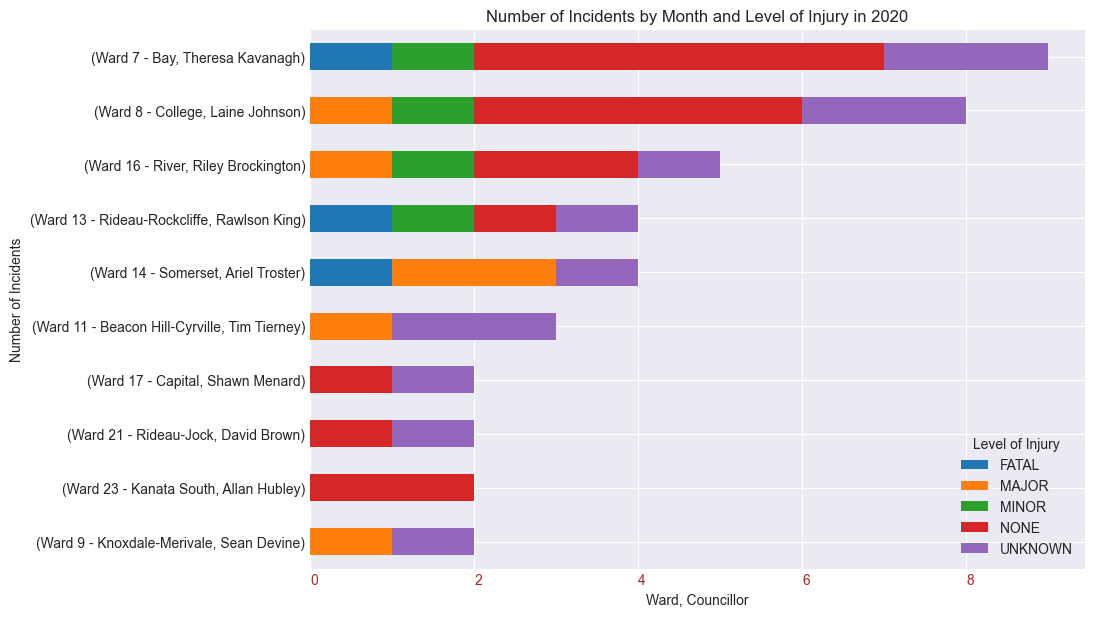

In [73]:
pivot_Top10Wards_peryear_df.plot(kind='barh', stacked=True, figsize =(10,7))
plt.title(f'Number of Incidents by Month and Level of Injury in {year_input}')
plt.xlabel('Ward, Councillor')
plt.ylabel('Number of Incidents')
plt.legend(title='Level of Injury')
plt.xticks(ha='left',color = 'brown')
plt.gca().invert_yaxis()

plt.show()

In [74]:
pivot_Top10Wards_peryear_df = pivot_Top10Wards_peryear_df.reset_index()
# pivot_Top10Wards_peryear_df.index.name = None
pivot_Top10Wards_peryear_df
pivot_Top10Wards_peryear_df = pivot_Top10Wards_peryear_df.set_index('Ward')
pivot_Top10Wards_peryear_df



Level_of_Injury,Councillor,FATAL,MAJOR,MINOR,NONE,UNKNOWN
Ward,,,,,,
Ward 7 - Bay,Theresa Kavanagh,1.0,NaN,1.0,5.0,2.0
Ward 8 - College,Laine Johnson,NaN,1.0,1.0,4.0,2.0
Ward 16 - River,Riley Brockington,NaN,1.0,1.0,2.0,1.0
Ward 13 - Rideau-Rockcliffe,Rawlson King,1.0,NaN,1.0,1.0,1.0
Ward 14 - Somerset,Ariel Troster,1.0,2.0,NaN,NaN,1.0
Ward 11 - Beacon Hill-Cyrville,Tim Tierney,NaN,1.0,NaN,NaN,2.0
Ward 17 - Capital,Shawn Menard,NaN,NaN,NaN,1.0,1.0
Ward 21 - Rideau-Jock,David Brown,NaN,NaN,NaN,1.0,1.0
Ward 23 - Kanata South,Allan Hubley,NaN,NaN,NaN,2.0,NaN


In [75]:
pivot_Top10Wards_peryear_dfa = pivot_Top10Wards_peryear_df.drop(columns='Councillor')
pivot_Top10Wards_peryear_dfa

Level_of_Injury,FATAL,MAJOR,MINOR,NONE,UNKNOWN
Ward,,,,,
Ward 7 - Bay,1.0,NaN,1.0,5.0,2.0
Ward 8 - College,NaN,1.0,1.0,4.0,2.0
Ward 16 - River,NaN,1.0,1.0,2.0,1.0
Ward 13 - Rideau-Rockcliffe,1.0,NaN,1.0,1.0,1.0
Ward 14 - Somerset,1.0,2.0,NaN,NaN,1.0
Ward 11 - Beacon Hill-Cyrville,NaN,1.0,NaN,NaN,2.0
Ward 17 - Capital,NaN,NaN,NaN,1.0,1.0
Ward 21 - Rideau-Jock,NaN,NaN,NaN,1.0,1.0
Ward 23 - Kanata South,NaN,NaN,NaN,2.0,NaN


In [76]:
pivot_Top10Wards_peryear_dfb = pivot_Top10Wards_peryear_df.reset_index()
pivot_Top10Wards_peryear_dfb['MultiIndexLabel'] =pivot_Top10Wards_peryear_dfb['Ward'].astype(str) + ' - ' + pivot_Top10Wards_peryear_dfb['Councillor']
pivot_Top10Wards_peryear_dfb

Level_of_Injury,Ward,Councillor,FATAL,MAJOR,MINOR,NONE,UNKNOWN,MultiIndexLabel
0,Ward 7 - Bay,Theresa Kavanagh,1.0,NaN,1.0,5.0,2.0,Ward 7 - Bay - Theresa Kavanagh
1,Ward 8 - College,Laine Johnson,NaN,1.0,1.0,4.0,2.0,Ward 8 - College - Laine Johnson
2,Ward 16 - River,Riley Brockington,NaN,1.0,1.0,2.0,1.0,Ward 16 - River - Riley Brockington
3,Ward 13 - Rideau-Rockcliffe,Rawlson King,1.0,NaN,1.0,1.0,1.0,Ward 13 - Rideau-Rockcliffe - Rawlson King
4,Ward 14 - Somerset,Ariel Troster,1.0,2.0,NaN,NaN,1.0,Ward 14 - Somerset - Ariel Troster
5,Ward 11 - Beacon Hill-Cyrville,Tim Tierney,NaN,1.0,NaN,NaN,2.0,Ward 11 - Beacon Hill-Cyrville - Tim Tierney
6,Ward 17 - Capital,Shawn Menard,NaN,NaN,NaN,1.0,1.0,Ward 17 - Capital - Shawn Menard
7,Ward 21 - Rideau-Jock,David Brown,NaN,NaN,NaN,1.0,1.0,Ward 21 - Rideau-Jock - David Brown
8,Ward 23 - Kanata South,Allan Hubley,NaN,NaN,NaN,2.0,NaN,Ward 23 - Kanata South - Allan Hubley
9,Ward 9 - Knoxdale-Merivale,Sean Devine,NaN,1.0,NaN,NaN,1.0,Ward 9 - Knoxdale-Merivale - Sean Devine


In [77]:
pivot_Top10Wards_peryear_dfb.columns

Index(['Ward', 'Councillor', 'FATAL', 'MAJOR', 'MINOR', 'NONE', 'UNKNOWN',
       'MultiIndexLabel'],
      dtype='object', name='Level_of_Injury')

In [78]:
pivot_Top10Wards_peryear_df.columns

Index(['Councillor', 'FATAL', 'MAJOR', 'MINOR', 'NONE', 'UNKNOWN'], dtype='object', name='Level_of_Injury')

In [79]:
pivot_Top10Wards_peryear_dfa.columns

Index(['FATAL', 'MAJOR', 'MINOR', 'NONE', 'UNKNOWN'], dtype='object', name='Level_of_Injury')

In [80]:
fig = px.bar(pivot_Top10Wards_peryear_dfb, x ='MultiIndexLabel', y =pivot_Top10Wards_peryear_dfa.columns, width=800, height= 600, barmode='stack',
        labels={"value" : 'Shooting Events', 'MultiIndexLabel':'Multi-Index Label - Ward, Councillor'},
        #title= f'Number of Shooting Events by Ward & Councillor in {year_input}')
)
fig.update_layout(title={
                         'text': f'Number of Shooting Events by Ward & Councillor in {year_input}',
                         'x': 0.5,  # Center the title horizontally
                         'xanchor': 'center'  # Anchor the title to the center
})

In [81]:
pivot_Top10Wards_peryear_dfa = pivot_Top10Wards_peryear_df[['FATAL',	'MAJOR',	'MINOR',	'NONE',	'UNKNOWN']]
pivot_Top10Wards_peryear_dfa

Level_of_Injury,FATAL,MAJOR,MINOR,NONE,UNKNOWN
Ward,,,,,
Ward 7 - Bay,1.0,NaN,1.0,5.0,2.0
Ward 8 - College,NaN,1.0,1.0,4.0,2.0
Ward 16 - River,NaN,1.0,1.0,2.0,1.0
Ward 13 - Rideau-Rockcliffe,1.0,NaN,1.0,1.0,1.0
Ward 14 - Somerset,1.0,2.0,NaN,NaN,1.0
Ward 11 - Beacon Hill-Cyrville,NaN,1.0,NaN,NaN,2.0
Ward 17 - Capital,NaN,NaN,NaN,1.0,1.0
Ward 21 - Rideau-Jock,NaN,NaN,NaN,1.0,1.0
Ward 23 - Kanata South,NaN,NaN,NaN,2.0,NaN


In [82]:
df_ward 

,Ward,Councillor,Level_of_Injury,ID
0,Ward 1 - OrlZans East-Cumberland,Matthew Luloff,FATAL,1
1,Ward 1 - OrlZans East-Cumberland,Matthew Luloff,MINOR,2
2,Ward 1 - OrlZans East-Cumberland,Matthew Luloff,UNKNOWN,3
3,Ward 10 - Gloucester-Southgate,Jessica Bradley,FATAL,5
4,Ward 10 - Gloucester-Southgate,Jessica Bradley,MAJOR,15
...,...,...,...,...
83,Ward 8 - College,Laine Johnson,UNKNOWN,12
84,Ward 9 - Knoxdale-Merivale,Sean Devine,FATAL,2
85,Ward 9 - Knoxdale-Merivale,Sean Devine,MAJOR,3
86,Ward 9 - Knoxdale-Merivale,Sean Devine,MINOR,3


In [83]:
pivot_Top10Wards_peryear_df

Level_of_Injury,Councillor,FATAL,MAJOR,MINOR,NONE,UNKNOWN
Ward,,,,,,
Ward 7 - Bay,Theresa Kavanagh,1.0,NaN,1.0,5.0,2.0
Ward 8 - College,Laine Johnson,NaN,1.0,1.0,4.0,2.0
Ward 16 - River,Riley Brockington,NaN,1.0,1.0,2.0,1.0
Ward 13 - Rideau-Rockcliffe,Rawlson King,1.0,NaN,1.0,1.0,1.0
Ward 14 - Somerset,Ariel Troster,1.0,2.0,NaN,NaN,1.0
Ward 11 - Beacon Hill-Cyrville,Tim Tierney,NaN,1.0,NaN,NaN,2.0
Ward 17 - Capital,Shawn Menard,NaN,NaN,NaN,1.0,1.0
Ward 21 - Rideau-Jock,David Brown,NaN,NaN,NaN,1.0,1.0
Ward 23 - Kanata South,Allan Hubley,NaN,NaN,NaN,2.0,NaN


In [84]:
df_ToD_peryear = df_peryear['Time_of_Day'].value_counts()
df_ToD_peryear

Evening      19
Night        11
Afternoon    10
Morning       6
Name: Time_of_Day, dtype: int64

In [85]:
df_month_peryear = df_peryear[['Occurred_Month', 'Level_of_Injury', 'ID']].groupby(['Occurred_Month','Level_of_Injury']).count() 
df_month_peryear = df_month_peryear.reset_index()
df_month_peryear

pivot_month_peryear_df = df_month_peryear.pivot(index='Occurred_Month', columns='Level_of_Injury', values='ID')
pivot_month_peryear_df = pivot_month_peryear_df.reset_index()
pivot_month_peryear_df = Sort_Dataframeby_Month(df=pivot_month_peryear_df,monthcolumnname='Occurred_Month')
pivot_month_peryear_df = pivot_month_peryear_df.set_index('Occurred_Month')
pivot_month_peryear_df



,FATAL,MAJOR,MINOR,NONE,NOT APPLICABLE,UNKNOWN
Occurred_Month,,,,,,
January,1.0,1.0,NaN,NaN,NaN,1.0
February,NaN,1.0,NaN,NaN,NaN,NaN
March,NaN,NaN,1.0,NaN,NaN,2.0
April,NaN,NaN,NaN,1.0,NaN,1.0
May,NaN,1.0,NaN,2.0,NaN,1.0
June,NaN,1.0,2.0,4.0,NaN,2.0
July,1.0,NaN,NaN,6.0,NaN,3.0
August,1.0,1.0,1.0,1.0,NaN,1.0
September,NaN,1.0,NaN,1.0,1.0,1.0


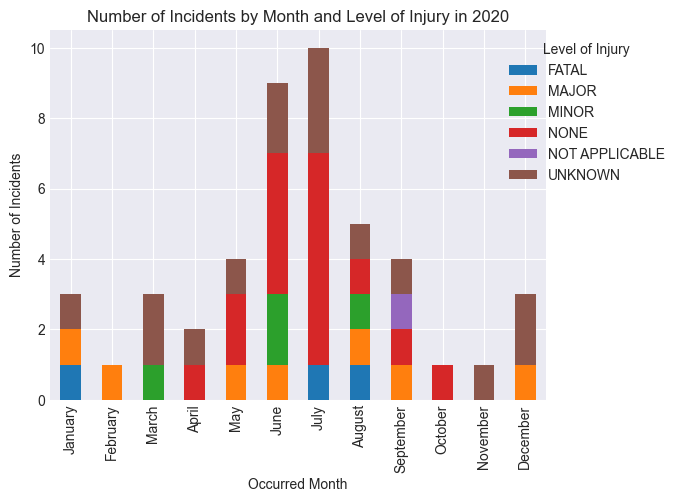

In [86]:
# Plotting
pivot_month_peryear_df.plot(kind='bar', stacked=True)
plt.title(f'Number of Incidents by Month and Level of Injury in {year_input}')
plt.xlabel('Occurred Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Level of Injury', bbox_to_anchor=(0.9, 1), loc='upper left')
#plt.xticks(list(pivot_month_df['Occurred_Month']))
plt.show()

In [87]:
pivot_month_peryear_df

,FATAL,MAJOR,MINOR,NONE,NOT APPLICABLE,UNKNOWN
Occurred_Month,,,,,,
January,1.0,1.0,NaN,NaN,NaN,1.0
February,NaN,1.0,NaN,NaN,NaN,NaN
March,NaN,NaN,1.0,NaN,NaN,2.0
April,NaN,NaN,NaN,1.0,NaN,1.0
May,NaN,1.0,NaN,2.0,NaN,1.0
June,NaN,1.0,2.0,4.0,NaN,2.0
July,1.0,NaN,NaN,6.0,NaN,3.0
August,1.0,1.0,1.0,1.0,NaN,1.0
September,NaN,1.0,NaN,1.0,1.0,1.0


In [88]:
figure = px.bar(pivot_month_peryear_df, 
                x =pivot_month_peryear_df.index, 
                y = pivot_month_peryear_df.columns, 
                labels={"variable": "Level of Injury", "Occurred_Month" : "Occurred Month", "value" : "Number of Incidents"},
                #title= f"Number of Incidents by Month and Level of Injury in {year_input}"
                width=900, height=600
               )
figure.update_layout(title={
                         'text': f'Number of Incidents by Month and Level of Injury in {year_input}',
                         'x': 0.5,  # Center the title horizontally
                         'xanchor': 'center'  # Anchor the title to the center
})
figure

In [89]:
df[['Division','y','x']].groupby('Division').median()

,y,x
Division,,
Central,45.426123,-75.689691
East,45.374896,-75.631476
West,45.348989,-75.792743


In [90]:
#%pip install folium


In [91]:

import folium
import webbrowser

#from IPython.display import display

In [92]:
#ottawa lat and long
#Rendering Folium maps in Azure Data Studio can be tricky due to limitations in how 
#it handles interactive visualizations. Folium generates HTML-based maps, 
#which are often better suited 
#for Jupyter Notebooks or web browsers that fully support HTML and JavaScript
lat = 45.424721 
long = -75.695000
Ottawa_map = folium.Map(location=[lat, long], zoom_start=12)

# display the map of San Francisco
Ottawa_map

# Ottawa_map.save('map.html')
# webbrowser.open('map.html')
# Ottawa_map = folium.Map()
# html_map = Ottawa_map._repr_html_()
# displayHTML(html_map)




In [93]:
#df.to_csv('Shootings')

In [94]:
#%reset